# LLE simulations for microcomb generation
## Parameters initialization
We start with some standard import

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120
import numpy as np
import sys,os
my_PyCore_dir = os.path.dirname('./../')
sys.path.append(my_PyCore_dir)
import PyCORe_main as pcm
from scipy.constants import c, hbar
%matplotlib widget

Now, let's define the dispersion array

In [2]:
Num_of_modes = 2**9
mu = np.arange(-Num_of_modes/2,Num_of_modes/2)
D2 = 4.1e6*2*np.pi 
Dint = (mu**2*D2/2) 

**Plot the dispersion below**

Text(0, 0.5, 'D_\\mathrm{int}, MHz')

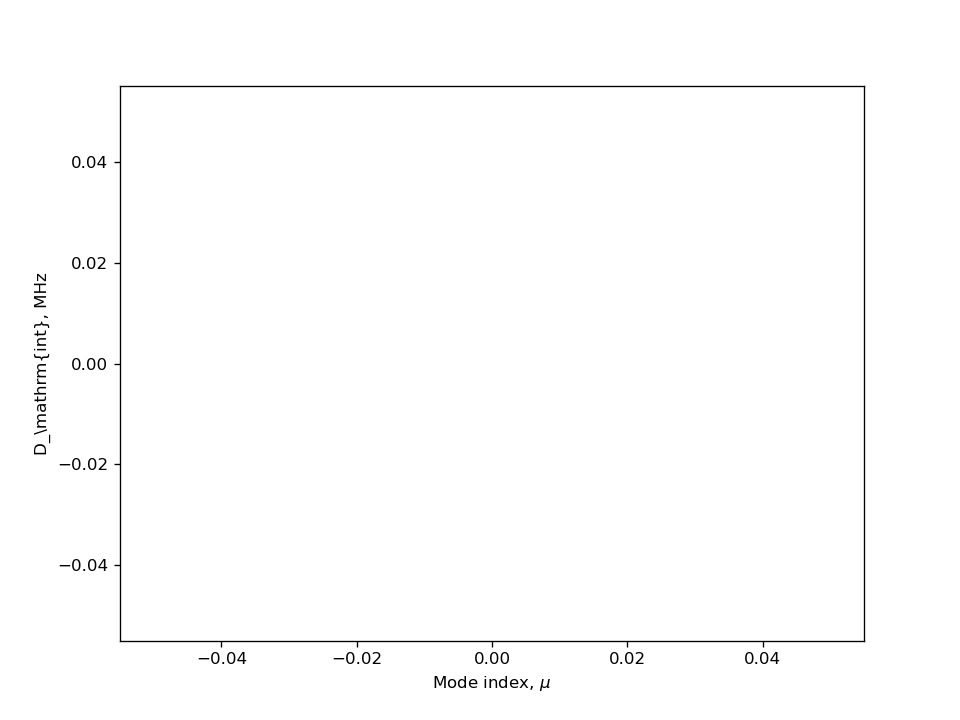

In [3]:
# plot dispersion here
fig, ax = plt.subplots(figsize=(8,6))
ax.plot()# ax.plot(x_array, y_array)
ax.set_xlabel(r'Mode index, $\mu$')
ax.set_ylabel(r'D_\mathrm{int}, MHz')

Now, we define the properties of the resonator

In [4]:
PhysicalParameters = {'n0' : 1.9,
                      'n2' : 2.4e-19,### m^2/W
                      'FSR' : 200e9 ,
                      'w0' : 2*np.pi*192e12,
                      'width' : 1.5e-6,
                      'height' : 0.85e-6,
                      'kappa_0' : 50e6*2*np.pi,
                      'kappa_ex' : 50e6*2*np.pi,
                      'Dint' : Dint
                      }

Now, let's define laser and its scan parameters

In [5]:
dNu_ini = -1e9 #Hz
dNu_end = 3e9 #Hz
nn = 2000
dOm = 2*np.pi*np.linspace(dNu_ini,dNu_end,nn)
scan_time = 1e-6 #s
P0 = 0.15### W
Pump = np.zeros(len(mu),dtype='complex')
Pump[0] = np.sqrt(P0)

And finally, we define the simulation parameters

In [6]:
simulation_parameters = {'slow_time' : scan_time,
                         'detuning_array' : dOm,
                         'noise_level' : 1e-9,
                         'output' : 'map',
                         'absolute_tolerance' : 1e-10,
                         'relative_tolerance' : 1e-6,
                         'max_internal_steps' : 2000}

## Class initialization

In [7]:
single_ring = pcm.Resonator()
single_ring.Init_From_Dict(PhysicalParameters)

**Convert the the pump power and detuning into normalized values**
$$
f_0^2 = \frac{8\kappa_0 g_0}{\kappa^3}P/\hbar\omega
$$
$$
\zeta_0 = 2\delta \omega/\kappa
$$
You can use '''single_ring.g0''' to get the value of the single photon Kerr frequency shift

In [8]:
# do it here

## Simulations

In [9]:
map2d = single_ring.Propagate_SplitStep(simulation_parameters, Pump,dt=0.5e-3)

Progress: |██████████████████████████████████████████████████| 100.0% Complete, elapsed time = 51.0 s


## Data Analysis
Now the simulation results are storred in the array map2d that has the size ```[dOm.size, mu.size]``` and contains the amplitude and the phase of the optical field envelope. 
Number of photons, storred in the cavity, defined as ```np.sum(map2d,axis=1)/Num_of_modes```, while number of modes for the $\mu$-th comb line is ```map2d[:,mu]/Num_of_modes```

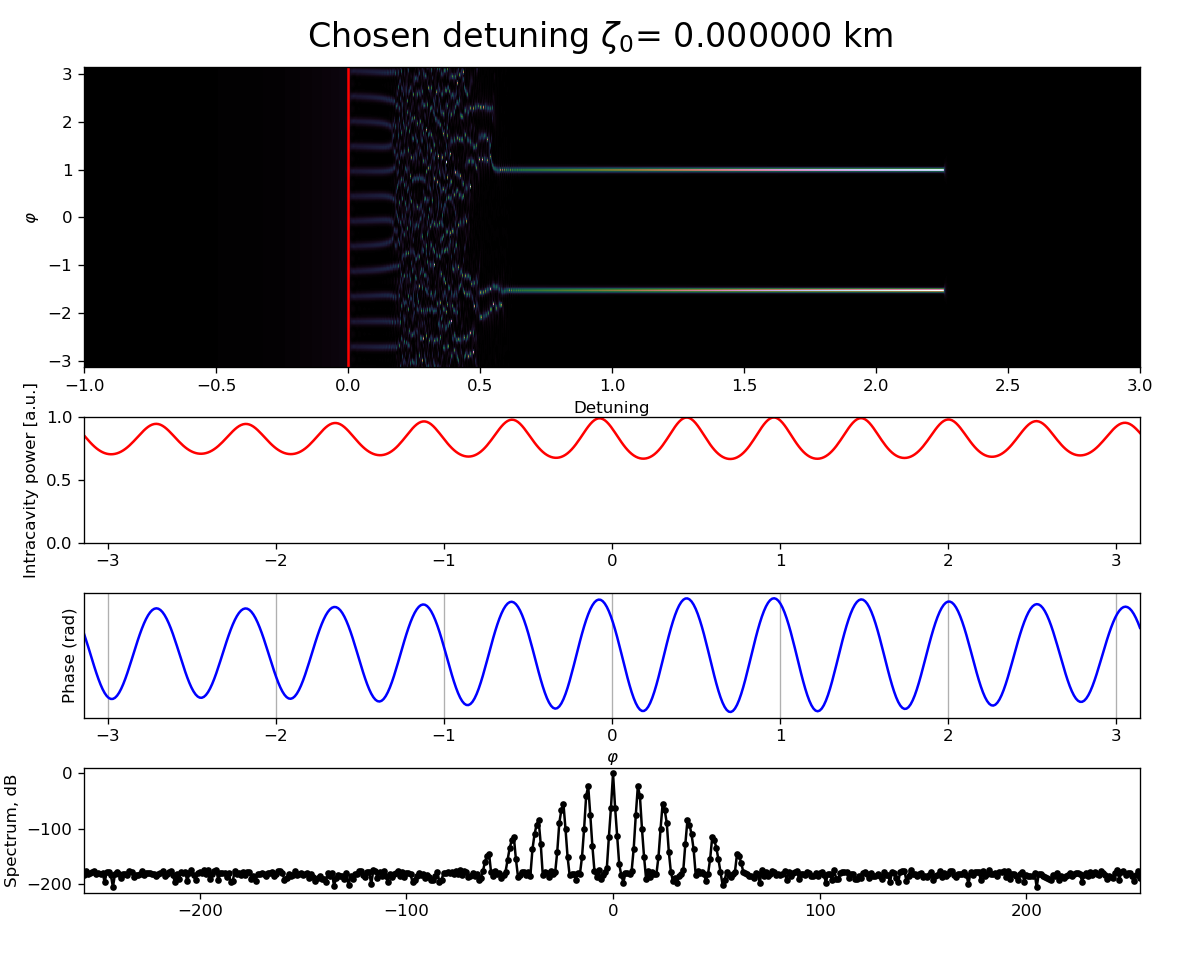

In [10]:
pcm.Plot_Map(np.fft.ifft(map2d,axis=1),dOm/2/np.pi/1e9)

The soliton existence range is defined as 
$$
\zeta_\mathrm{max} = \frac{\pi^2 f^2}{8}.
$$
**Compare the numerical result with the analytical formula**

In [11]:
#  Do it here

**Now, plot the simulated transmission trace** using
$$
S_\mathrm{out} = S_\mathrm{in}-\sqrt{\kappa_\mathrm{ex}}A,
$$
where $A$ is the field in the cavity, which can be calculated as 
```map2d/Num_of_modes```. Don't forget that $S_\mathrm{in}$ is CW wave.m 


**Try different discretization of the fast time (number of modes). See how the results change.**

**Plot the outpout spectrum and calculate the conversion efficiency from the pump to the comb lines**

In [12]:
# Do it here

## Breathers
Identify the detuing at which you can observe breathers and simulate them. You need to pick the detuning, take the solution as initial condition, create a new detuning array, and run the simulation

In [49]:
idx = #define the right index
Aini = map2d[idx, :]
dOm_breather = np.ones(nn)*dOm[idx]
scan_time_breather = 1e-7
simulation_parameters_breather = {'slow_time' : scan_time_breather,
                         'detuning_array' : dOm_breather,
                         'noise_level' : 1e-9,
                         'output' : 'map',
                         'absolute_tolerance' : 1e-10,
                         'relative_tolerance' : 1e-6,
                         'max_internal_steps' : 2000}
map2d_breather = single_ring.Propagate_SplitStep(simulation_parameters_breather, Pump,Seed=Aini, HardSeed=True,dt=0.5e-3)

Progress: |██████████████████████████████████████████████████| 100.0% Complete, elapsed time = 05.1 s


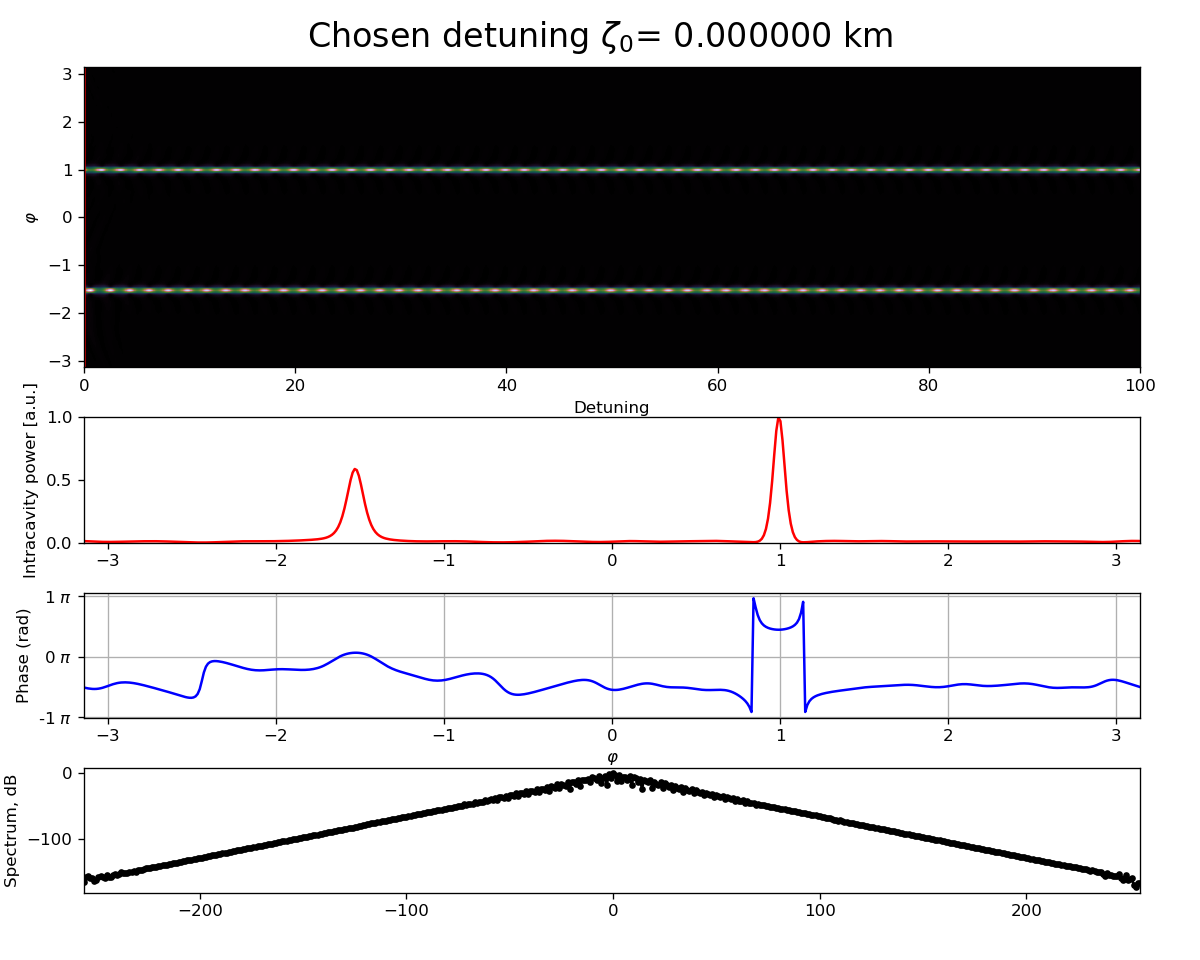

In [50]:
pcm.Plot_Map(np.fft.ifft(map2d_breather,axis=1),np.linspace(0,scan_time_breather,nn)*1e9)

Now, you can estimate the beating frequency at the photodector. What simulation parameters define the bandwidth and the minimal beating frequency that can be detected? **Calculate the beating frequency.**
Do to so, you take the $\mu=1$ mode and take the Fourier transform of its time evolution 
*You can also use scipy.signal.periodogram function*

## Higher order dispersion terms
Add $D_3$, $D_4$, etc. What happens with the soliton existence range, with the repetition rate?